In [13]:
import pandas as pd
import numpy as np
from src.data_loader import *
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = split_dataset()

In [3]:
data.keys()

dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test'])

In [4]:
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

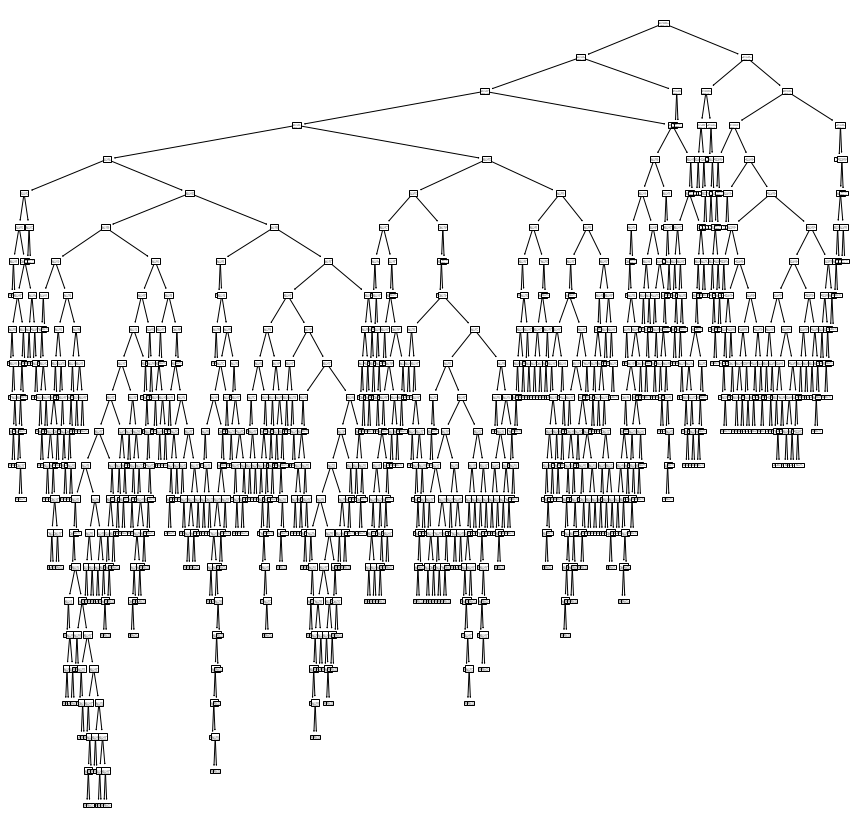

In [8]:
# Fit the regression tree to the training set
dt = DecisionTreeRegressor(random_state = 123)
dt.fit(X_train, y_train)

# Plot the regression tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(dt)
plt.show()

In [21]:
# Calculating the train and test MSE
y_pred_train = market_tree.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)

y_pred_test = market_tree.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Predict r2 score on the train and test sets
y_train_pred = dt.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

y_test_pred = dt.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.4f}, Train R2: {r2_train:.4f}")
print(f"Test MSE: {mse_test:.4f}, Test R2: {r2_test:.4f}")

Train MSE: 0.0000, Train R2: 1.0000
Test MSE: 54858.3463, Test R2: 0.7099
